In [1]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from math import floor
from pprint import pprint



In [2]:
file = Path('../output_data/fred_data.csv')
fred_data = pd.read_csv(file)
fred_data

,Year,Avg. 30 Year Fixed Mortgage Rate,Avg. 15 Year Fixed Mortgage Rate,Avg. Median Home Sale Price,Avg. Housing Inventory,Avg. Home Price Index,Avg. GDP (Billions of $),Avg. CPI,Avg. Unemployment Rate,Avg. Household Debt to GDP
0,1963,NaN,NaN,18050.00,NaN,NaN,637.45,31.81,5.64,NaN
1,1964,NaN,NaN,18925.00,NaN,NaN,684.46,32.30,5.16,NaN
2,1965,NaN,NaN,20125.00,NaN,NaN,742.29,32.73,4.51,NaN
3,1966,NaN,NaN,21500.00,NaN,NaN,813.41,33.55,3.79,NaN
4,1967,NaN,NaN,22750.00,NaN,NaN,859.96,34.71,3.84,NaN
...,...,...,...,...,...,...,...,...,...,...
56,2019,3.94,3.39,320250.00,1113750.0,209.45,21521.40,263.21,3.68,76.27
57,2020,3.11,2.60,336950.00,838500.0,222.12,21322.95,267.70,8.09,80.03
58,2021,2.96,2.27,396800.00,727000.0,260.06,23594.03,277.25,5.37,77.97
59,2022,5.34,4.58,457475.00,714250.0,298.52,25744.11,294.30,3.64,76.64


In [9]:
yr30_unemploy_df = fred_data[['Year','Avg. 30 Year Fixed Mortgage Rate', 'Avg. Unemployment Rate']]
yr15_unemploy_df = fred_data[['Year','Avg. 15 Year Fixed Mortgage Rate', 'Avg. Unemployment Rate']]
yr30_unemploy_df = yr30_unemploy_df.dropna()
yr15_unemploy_df = yr15_unemploy_df.dropna()

#print(yr30_unemploy_df)
print(yr15_unemploy_df)

    Year  Avg. 15 Year Fixed Mortgage Rate  Avg. Unemployment Rate
28  1991                              8.40                    6.85
29  1992                              7.94                    7.49
30  1993                              6.82                    6.91
31  1994                              7.89                    6.10
32  1995                              7.48                    5.59
33  1996                              7.32                    5.41
34  1997                              7.13                    4.94
35  1998                              6.59                    4.50
36  1999                              7.06                    4.22
37  2000                              7.72                    3.97
38  2001                              6.50                    4.74
39  2002                              5.98                    5.78
40  2003                              5.17                    5.99
41  2004                              5.21                    

In [15]:
# Calculate the correlation coefficient between Avg. 15 Year Fixed Mortgage Rate and Unemployment Rate
yr30_corr_coef = yr30_unemploy_df['Avg. 30 Year Fixed Mortgage Rate'].corr(yr30_unemploy_df['Avg. Unemployment Rate'])
yr15_corr_coef = yr15_unemploy_df['Avg. 15 Year Fixed Mortgage Rate'].corr(yr15_unemploy_df['Avg. Unemployment Rate'])
print(f"Correlation Coefficient 30 yr: {yr30_corr_coef}") 
print(f"Correlation Coefficient 15 yr: {yr15_corr_coef}") 

Correlation Coefficient 30 yr: 0.3248479866385878
Correlation Coefficient 15 yr: -0.19033647300454007


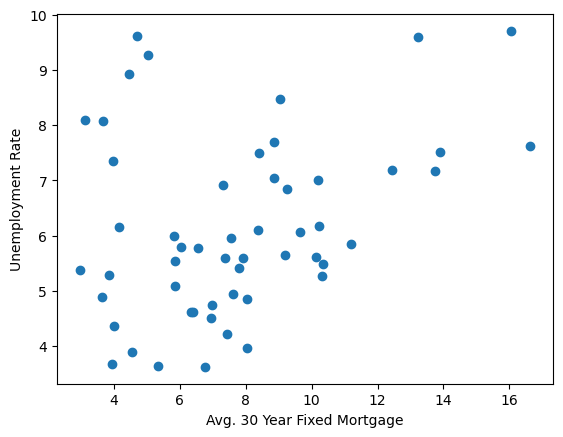

In [18]:
# Plot Avg. 30 Year Fixed Mortgage versus Avg. Home Price Index
plt.scatter(yr30_unemploy_df.loc[:,"Avg. 30 Year Fixed Mortgage Rate"],yr30_unemploy_df.loc[:,"Avg. Unemployment Rate"])
plt.xlabel('Avg. 30 Year Fixed Mortgage')
plt.ylabel('Unemployment Rate')
plt.show()

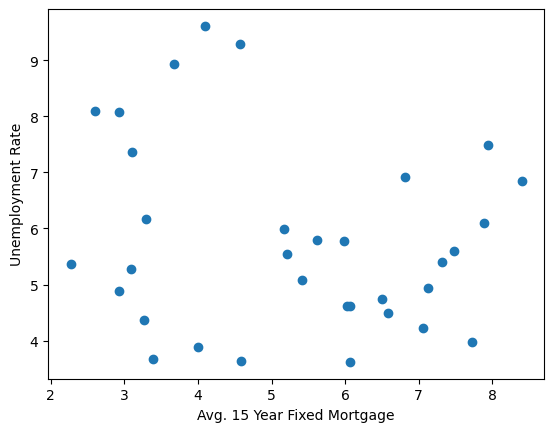

In [19]:
# Plot Avg. 15 Year Fixed Mortgage versus Avg. Home Price Index
plt.scatter(yr15_unemploy_df.loc[:,"Avg. 15 Year Fixed Mortgage Rate"],yr15_unemploy_df.loc[:,"Avg. Unemployment Rate"])
plt.xlabel('Avg. 15 Year Fixed Mortgage')
plt.ylabel('Unemployment Rate')
plt.show()